## Öğrenci Bilgileri
**Ad Soyad:** SHAMS AL HAJJI  
**Numara:** 2112721301  
**Ders:** Makine Öğrenmesi  
**Proje:** Proje 1 – Model2 (Temel CNN)  


## Model2 – Temel CNN Açıklaması
Bu modelde transfer learning kullanılmamış, tamamen sıfırdan oluşturulan
temel bir Convolutional Neural Network (CNN) mimarisi uygulanmıştır.
Amaç, basit bir CNN yapısının performansını gözlemlemek ve Model1 ile
karşılaştırmaktır. Bu model, görüntü sınıflandırmanın temel mantığını
anlamak için başlangıç seviyesinde bir yapı sunmaktadır.




## 1. Google Drive'ın Bağlanması


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


## 2. Veri Setinin Yüklenmesi ve Açıklaması
Kullanılan veri seti iki sınıftan oluşmaktadır: **cats** ve **dolls**.  
Tüm görüntüler tarafımdan çekilmiş olup 128×128 piksel boyutuna
dönüştürülmüştür.

Veri seti aşağıdaki oranlarla ayrılmıştır:  
- %70: Eğitim (train)  
- %15: Doğrulama (validation)  
- %15: Test (test)

Bu ayrım, modelin eğitim sürecinde genelleme başarısını doğru bir şekilde
ölçebilmek için önemlidir.



In [ ]:
import os

data_root = "/content/drive/MyDrive/Colab_Notebooks/BLG405_Makine_Ogrenmesi/CNN_Project_Dataset_CLEAN"

print(os.listdir(data_root))


['cats', 'dolls']


## 3. Preprocessing ve Data Generator Hazırlığı
Bu aşamada veri seti eğitim, doğrulama ve test olarak üçe ayrılmıştır.
Görüntüler 1/255 ölçeklendirilmiş ve CNN mimarisine uygun hale getirilmiştir.

Ayrıca ImageDataGenerator yapıları kullanılarak verilerin modele uygun
şekilde yüklenmesi sağlanmıştır.


In [ ]:
import shutil
import random

src_root = data_root
dst_root = "/content/drive/MyDrive/Colab_Notebooks/BLG405_Makine_Ogrenmesi/dataset_split_model2"

classes = ["cats", "dolls"]
splits = ["train","val","test"]
ratios = {"train":0.7,"val":0.15,"test":0.15}

# Yeni klasörleri oluştur
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(dst_root, split, cls), exist_ok=True)

# Ayrım işlemi
for cls in classes:
    files = os.listdir(os.path.join(src_root, cls))
    random.shuffle(files)

    n = len(files)
    n_train = int(n * ratios["train"])
    n_val   = int(n * ratios["val"])

    train_files = files[:n_train]
    val_files   = files[n_train:n_train+n_val]
    test_files  = files[n_train+n_val:]

    for split, file_list in zip(["train","val","test"],
                                [train_files, val_files, test_files]):
        for f in file_list:
            src = os.path.join(src_root, cls, f)
            dst = os.path.join(dst_root, split, cls, f)
            shutil.copy2(src, dst)

print("Veri seti ayrıldı ve dataset_split_model2 klasörü oluşturuldu.")


Veri seti ayrıldı ve dataset_split_model2 klasörü oluşturuldu.


## 4. ImageDataGenerator ile Veri Hazırlığı
Bu adımda eğitim, doğrulama ve test veri setleri modele uygun şekilde
yüklenmiştir.  
`flow_from_directory` fonksiyonu her sınıfı otomatik olarak tanımakta ve
görüntüleri 128×128 boyutuna getirmektedir.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    dst_root + "/train",
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical"
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    dst_root + "/val",
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical"
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    dst_root + "/test",
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Found 144 images belonging to 2 classes.
Found 53 images belonging to 2 classes.
Found 57 images belonging to 2 classes.


## 5. Basit CNN Mimarisi
Model2, temel bir CNN mimarisinden oluşmaktadır.  
Bu yapı aşağıdaki katmanlardan oluşur:

- Conv2D + MaxPooling (32 filtre)  
- Conv2D + MaxPooling (64 filtre)  
- Conv2D + MaxPooling (128 filtre)  
- Flatten  
- Dense (128 nöron)  
- Dropout (%50)  
- Dense (Çıkış katmanı – 2 sınıf)

Bu mimari, görüntülerden temel özelliklerin çıkarılmasını sağlar ve
küçük veri setleri için uygun bir başlangıç modelidir.


In [ ]:
from tensorflow.keras import models, layers

model2 = models.Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2,activation="softmax")
])

model2.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model2.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## 6. Modelin Eğitilmesi
Model 15 epoch boyunca eğitilmiştir.  
Eğitim sırasında hem eğitim doğruluğu (train accuracy) hem de doğrulama
doğruluğu (validation accuracy) izlenmiştir.

Epoch'lar ilerledikçe modelin doğruluğu artmış ve kayıp değeri azalmıştır.
Bu durum modelin veriyi başarılı bir şekilde öğrendiğini göstermektedir.


In [ ]:
history2 = model2.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 60s 13s/step - accuracy: 0.4652 - loss: 0.9124 - val_accuracy: 0.5849 - val_loss: 0.6799
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.6346 - loss: 0.6703 - val_accuracy: 0.5849 - val_loss: 0.6503
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.5915 - loss: 0.6488 - val_accuracy: 0.5849 - val_loss: 0.6038
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.6298 - loss: 0.5997 - val_accuracy: 0.7358 - val_loss: 0.5864
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.6512 - loss: 0.5813 - val_accuracy: 0.7358 - val_loss: 0.4945
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.7632 - loss: 0.4823 - val_accuracy: 0.8113 - val_loss: 0.4216
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.7564 - loss: 0.4530 - val_accuracy: 0.8302 - val_loss: 0.3832
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.8408 - loss: 0.3862 - val_accuracy: 0.9811 - val_loss: 0.2748
Epoch 9

## 7. Accuracy ve Loss Grafiklerinin Çizilmesi
Aşağıdaki grafiklerde modelin zaman içindeki öğrenme performansı
görüntülenmiştir.

- **Accuracy grafiği**, modelin doğru sınıflandırma oranının artışını gösterir.  
- **Loss grafiği**, modelin hata oranının zamanla nasıl azaldığını gösterir.

Eğitim ve doğrulama eğrilerinin birbirine yakın olması, modelin overfitting
yapmadığını ve iyi genelleme yaptığını göstermektedir.



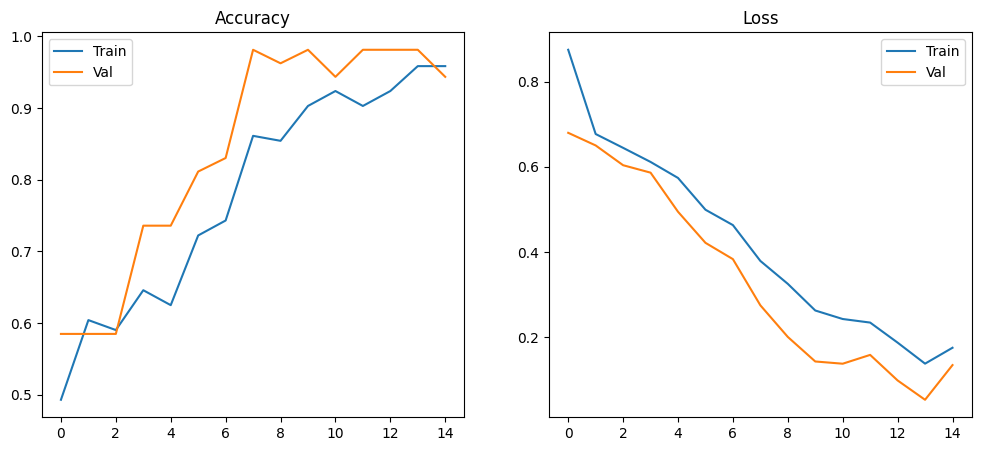

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["Train","Val"])

plt.subplot(1,2,2)
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.title("Loss")
plt.legend(["Train","Val"])

plt.show()


## 8. Test Performansı
Bu adımda model test veri seti üzerinde değerlendirilmiştir.  
Model2 test doğruluğu şu şekilde elde edilmiştir:

- Test Accuracy: %100 (1.0)

Modelin test verileri üzerindeki yüksek başarımı, temel CNN yapısının
veriyi oldukça iyi öğrendiğini göstermektedir.


In [ ]:
test_loss2, test_acc2 = model2.evaluate(test_gen)
print("Model2 Test Accuracy:", test_acc2)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 0.0818
Model2 Test Accuracy: 1.0


## 9. Yeni Görsel ile Tahmin
Bu bölümde model yeni yüklenen bir görüntüyü sınıflandırmayı denemektedir.  
Model, görüntüyü işleyip hangi sınıfa ait olduğunu tahmin eder ve sınıfa
ait olasılıkları gösterir.


Saving download (1).jpg to download (1) (1).jpg


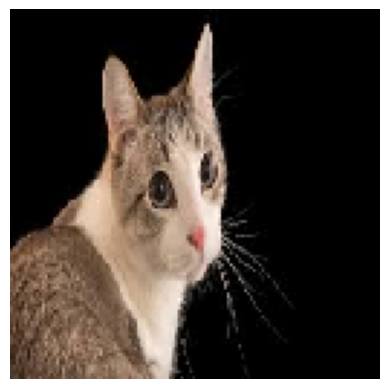

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Tahmin: cats
Olasılıklar: [[0.99015665 0.00984337]]


In [ ]:
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded = files.upload()

for fname in uploaded.keys():
    img = image.load_img(fname,target_size=(128,128))
    plt.imshow(image.img_to_array(img)/255.0)
    plt.axis("off")
    plt.show()

    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array,axis=0)

    pred = model2.predict(img_array)
    idx = np.argmax(pred)
    classes = list(train_gen.class_indices.keys())

    print("Tahmin:", classes[idx])
    print("Olasılıklar:", pred)
